**IMPORT LIBRARY**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

**LOAD** **DATA**

In [ ]:
mydata = pd.read_csv('world_cup.csv')
mydata.head()

,player,season,team,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
0,Cristian Pavón,2018,Argentina,-0.42,-0.55,0.08,-0.24,-0.61,-0.72,-0.05,0.15,0.30,-0.79,-0.80,-0.45,-0.23,-0.38,-0.91,-0.58
1,Eduardo Salvio,2018,Argentina,-0.42,-0.50,-0.51,0.64,0.02,-0.46,-0.05,0.48,0.61,0.67,0.32,-0.45,0.21,-1.11,0.68,-0.03
2,Enzo Pérez,2018,Argentina,-0.42,0.11,-0.51,-0.69,0.27,-0.65,-0.36,-0.34,0.35,-0.22,-0.80,-0.45,-0.89,0.72,0.04,-0.66
3,Federico Fazio,2018,Argentina,-0.42,-0.59,-0.51,-0.69,-0.97,-0.91,-0.67,-0.84,-0.82,-0.79,-0.64,-0.45,0.21,-1.11,-0.59,-0.77
4,Franco Armani,2018,Argentina,-0.42,-0.59,-0.51,-0.80,-0.67,0.64,-0.67,-0.67,-0.82,-0.79,-0.64,-0.45,-0.89,-1.11,-0.91,-0.77


**Quick Glance**

In [ ]:
Glance=10
view=mydata.head(Glance)
print (view)

              player  season       team  ...  fouls_z  fouled_z  nsxg_z
0     Cristian Pavón    2018  Argentina  ...    -0.38     -0.91   -0.58
1     Eduardo Salvio    2018  Argentina  ...    -1.11      0.68   -0.03
2         Enzo Pérez    2018  Argentina  ...     0.72      0.04   -0.66
3     Federico Fazio    2018  Argentina  ...    -1.11     -0.59   -0.77
4      Franco Armani    2018  Argentina  ...    -1.11     -0.91   -0.77
5    Gabriel Mercado    2018  Argentina  ...     1.81      0.68   -0.47
6    Gonzalo Higuaín    2018  Argentina  ...    -0.38     -0.59   -0.31
7  Javier Mascherano    2018  Argentina  ...     4.37      1.32   -0.31
8       Lionel Messi    2018  Argentina  ...     0.35      4.49    4.55
9       Lucas Biglia    2018  Argentina  ...    -1.11     -0.59   -0.69

[10 rows x 19 columns]


**Shape of dataset**

In [ ]:
dim=mydata.shape
print(dim)

(5899, 19)


**DATA TYPE**

In [ ]:
Data_type=mydata.dtypes
print(Data_type)

player              object
season               int64
team                object
goals_z            float64
xg_z               float64
crosses_z          float64
boxtouches_z       float64
passes_z           float64
progpasses_z       float64
takeons_z          float64
progruns_z         float64
tackles_z          float64
interceptions_z    float64
clearances_z       float64
blocks_z           float64
aerials_z          float64
fouls_z            float64
fouled_z           float64
nsxg_z             float64
dtype: object


In [ ]:
#Decription
description=mydata.describe()
print(description)

        season   goals_z      xg_z  ...   fouls_z  fouled_z    nsxg_z
count  5899.00  5.90e+03  5.90e+03  ...  5.90e+03  5.90e+03  5.90e+03
mean   1996.44  4.41e-05  1.61e-04  ... -2.12e-04 -4.58e-05  8.98e-05
std      15.32  9.99e-01  9.99e-01  ...  9.99e-01  9.99e-01  9.99e-01
min    1966.00 -5.00e-01 -7.20e-01  ... -1.28e+00 -1.10e+00 -1.01e+00
25%    1986.00 -4.20e-01 -5.90e-01  ... -7.90e-01 -7.10e-01 -7.30e-01
50%    1998.00 -4.10e-01 -3.90e-01  ... -1.80e-01 -2.80e-01 -3.40e-01
75%    2010.00 -3.90e-01  2.00e-01  ...  5.70e-01  4.50e-01  3.80e-01
max    2018.00  1.01e+01  8.60e+00  ...  6.86e+00  6.77e+00  7.28e+00

[8 rows x 17 columns]


**Rounding off upto 2 decimal places**

In [ ]:
pd.set_option('precision', 2)
precision=mydata.describe()
print(precision)

        season   goals_z      xg_z  ...   fouls_z  fouled_z    nsxg_z
count  5899.00  5.90e+03  5.90e+03  ...  5.90e+03  5.90e+03  5.90e+03
mean   1996.44  4.41e-05  1.61e-04  ... -2.12e-04 -4.58e-05  8.98e-05
std      15.32  9.99e-01  9.99e-01  ...  9.99e-01  9.99e-01  9.99e-01
min    1966.00 -5.00e-01 -7.20e-01  ... -1.28e+00 -1.10e+00 -1.01e+00
25%    1986.00 -4.20e-01 -5.90e-01  ... -7.90e-01 -7.10e-01 -7.30e-01
50%    1998.00 -4.10e-01 -3.90e-01  ... -1.80e-01 -2.80e-01 -3.40e-01
75%    2010.00 -3.90e-01  2.00e-01  ...  5.70e-01  4.50e-01  3.80e-01
max    2018.00  1.01e+01  8.60e+00  ...  6.86e+00  6.77e+00  7.28e+00

[8 rows x 17 columns]


**Finding Correlation**

In [ ]:
Correlation=mydata.corr()
print(Correlation)

                   season   goals_z      xg_z  ...   fouls_z  fouled_z    nsxg_z
season           1.00e+00 -1.78e-04  4.27e-04  ...  8.53e-05 -4.66e-06 -3.52e-05
goals_z         -1.78e-04  1.00e+00  7.15e-01  ...  1.39e-01  2.96e-01  3.47e-01
xg_z             4.27e-04  7.15e-01  1.00e+00  ...  2.15e-01  3.96e-01  4.70e-01
crosses_z        6.14e-04  1.37e-01  2.01e-01  ...  1.51e-01  3.16e-01  7.63e-01
boxtouches_z     1.86e-04  5.49e-01  7.32e-01  ...  2.55e-01  4.27e-01  4.95e-01
passes_z         2.03e-05  3.86e-02  9.57e-02  ...  3.72e-01  3.47e-01  3.89e-01
progpasses_z    -1.12e-04 -9.66e-02 -1.13e-01  ...  1.47e-01  1.22e-01  2.29e-01
takeons_z       -3.91e-04  2.84e-01  3.69e-01  ...  2.48e-01  5.32e-01  5.90e-01
progruns_z      -5.02e-05  1.81e-01  2.67e-01  ...  2.83e-01  4.56e-01  5.61e-01
tackles_z        3.41e-05 -3.31e-03  1.30e-02  ...  4.10e-01  2.51e-01  1.95e-01
interceptions_z -2.66e-05 -3.96e-02 -2.55e-02  ...  3.68e-01  2.07e-01  1.29e-01
clearances_z     2.14e-04 -1

In [ ]:
#Skewness
Skewness=mydata.skew()
print(Skewness)

season            -0.37
goals_z            3.07
xg_z               3.03
crosses_z          2.67
boxtouches_z       2.26
passes_z           0.84
progpasses_z       1.10
takeons_z          2.44
progruns_z         1.64
tackles_z          1.53
interceptions_z    1.55
clearances_z       2.02
blocks_z           2.90
aerials_z          2.69
fouls_z            1.13
fouled_z           1.67
nsxg_z             1.95
dtype: float64


**Histogram**

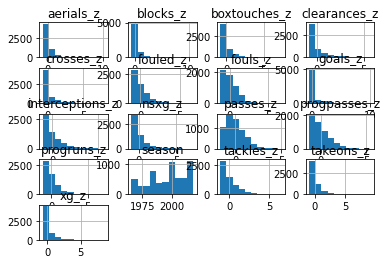

In [ ]:
histogram=mydata.hist()
plt.show()

**Correlation Matrix**

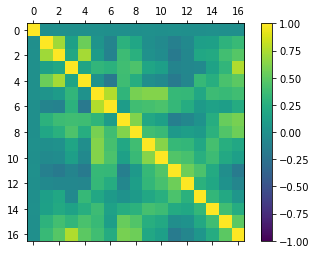

In [ ]:
correlation = mydata.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)#
#ax.set_xlabel(col_names)
#ax.set_ylabel(col_names)
plt.show()

**Scatter plot**

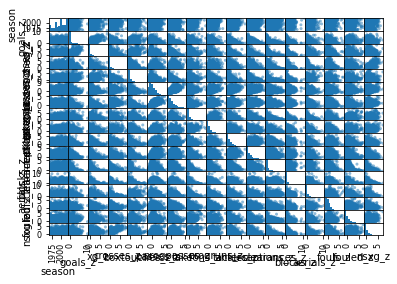

In [ ]:
Matrix=scatter_matrix(mydata)

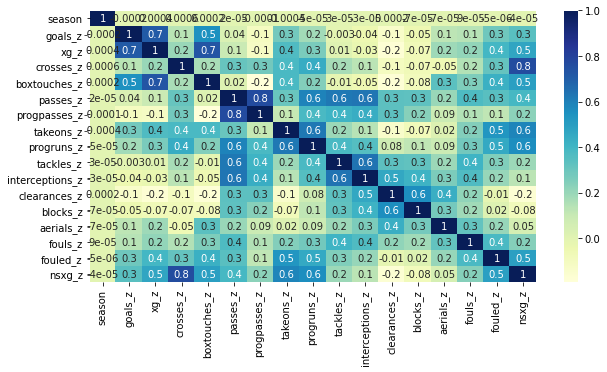

goals_z         1.00
xg_z            0.72
crosses_z       0.14
boxtouches_z    0.55
takeons_z       0.28
progruns_z      0.18
clearances_z    0.13
aerials_z       0.13
fouls_z         0.14
fouled_z        0.30
nsxg_z          0.35
Name: goals_z, dtype: float64

In [ ]:
import seaborn as sns
correlation=mydata.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation, annot=True, cmap=plt.cm.YlGnBu, fmt='.1g')
plt.show()
# Correlation with feature selection
correlation = abs(correlation["goals_z"])

relevant_feature = correlation[correlation>0.10]
relevant_feature

**Data Defining**

In [ ]:
column_names =['xg_z','crosses_z','boxtouches_z','takeons_z','progruns_z','clearances_z','aerials_z','fouls_z','fouled_z','nsxg_z']
x=mydata[column_names]
y=mydata[['goals_z']]

**Data frame**

In [ ]:
df = pd.DataFrame(mydata, columns = ['xg_z','crosses_z','goals_z','boxtouches_z','takeons_z','progruns_z','clearances_z','aerials_z','fouls_z','fouled_z','nsxg_z'])
x=np.array(df[['xg_z','crosses_z','boxtouches_z','takeons_z','progruns_z','clearances_z','aerials_z','fouls_z','fouled_z','nsxg_z']])
y=np.array(df['goals_z'])

**Splitting Data into 70:30 ratio**

In [ ]:
trainf,testf,trainl,testl= train_test_split(x,y,test_size = .30,random_state=15)
#printing train and test length 
print(len(trainf))
print(len(trainl))
print(len(testf))
print(len(testl))

4129
4129
1770
1770


**Linear Regression**

In [ ]:
Obj = LinearRegression()

**FITTING THE MODEL**

In [ ]:
Obj.fit(trainf,trainl)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**PREDICTION**

In [ ]:
result = Obj.predict(testf)

**Linear Regression Plot**

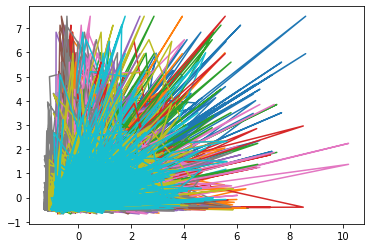

In [ ]:
plt.plot(testf,testl)
plt.plot(testf,result)
plt.show()
 

In [ ]:
df = pd.DataFrame({'Actual': testl, 'Predicted': result})
df1 = df.head(10)
df1

,Actual,Predicted
0,-0.46,-0.48
1,-0.39,0.42
2,-0.46,0.05
3,-0.42,-0.47
4,-0.42,-0.35
5,-0.39,-0.31
6,-0.43,-0.20
7,-0.40,-0.48
8,-0.46,-0.51
9,-0.41,0.04


**actual values vs predicted values graph**

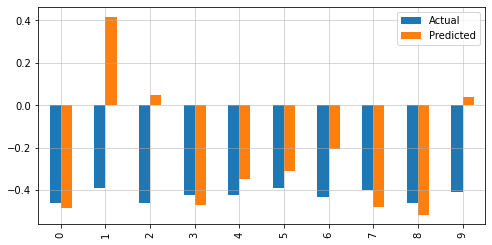

In [ ]:
df1.plot(kind='bar',figsize=(8,4))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

**EVALUATION**

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(testl, result))  
print('Mean Squared Error:', metrics.mean_squared_error(testl, result))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testl, result)))
print('Variance:',r2_score(testl,result))

Mean Absolute Error: 0.4164409676697708
Mean Squared Error: 0.506803424460817
Root Mean Squared Error: 0.7119012743778571
Variance: 0.5094474264058543


**Random Forest**

In [ ]:
RF = RandomForestRegressor()

**Fitting the Model**

In [ ]:
RF = RF.fit(trainf, trainl)

**Prediction**

In [ ]:
result_prediction = RF.predict(testf)

**Evaluation**

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testl, result_prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(testl, result_prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testl, result_prediction)))
print('Variance:',r2_score(testl,result_prediction))

Mean Absolute Error: 0.4134887005649718
Mean Squared Error: 0.5568635021016949
Root Mean Squared Error: 0.7462328739084703
Variance: 0.4609925448170382
